# Proyecto 2
*Pillow*

A partir de [esta imagen](https://drive.google.com/file/d/1_CJShAhhShNdOq1vGUK-9RZ8GQ3RhEOi/view?usp=sharing), obtener [esta imagen](https://drive.google.com/file/d/1eLnVodI0VBqcH4lCsbRpLdV9MV8mTqR5/view?usp=sharing).

Nota: El procesamiento debe ser adaptivo a otras imágenes similares, esto significa que se deben usar proporciones de la imagen en lugar de cantidad de pixeles fijos.
Cómo ayuda, se sabe que:
- La imagen original se partió en 3 partes iguales;
- De la parte central, se utilizó el 60% de la altura de la imagen
- El recuadro está separado del borde un 2% en los laterales y 5% arriba y abajo y tiene un grosor fijo de 5px.
- La imagen resultante debe conservar las mismas dimensiones que la original y guardarse en formato PNG.
De ser necesario, utilice la documentación para aplicar otras funciones no vistas en clases.


**Entrega**

Día: Domingo 29/05 inclusive

Metodología: Descargue el archivo de Colab haciendo click en 'Archivo'->'Descargar'->'Descargar .ipynb', renómbrelo con su apellido y nombre con el formato *apellido-nombre.ipynb* y adjuntelo en el formulario de Moodle junto con la imagen resultante.

In [2]:
!pip install pillow #instalo la libreria 
from PIL import Image
from PIL import ImageDraw


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Hago el primer corte y lo roto

(542, 542)


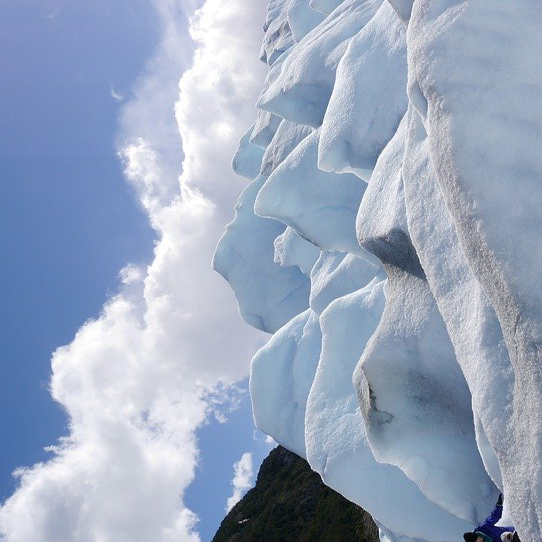

In [3]:
original = Image.open('/content/drive/MyDrive/Colab Notebooks/Proyecto 2/glaciar.jpg')  # Abrir la imagen (como es generico lo unico que se debe modificar es la ruta de acceso a la imagen)


or_1 = original.crop((0, 0, round(original.width/3), original.height))   #hago la primera division de la imagen
or_1 = or_1.rotate(90,expand=True) #roto 90 grados la imagen y le dejo el valor de expand en True para tener completa la imagen
or_1= or_1.resize((or_1.width,original.height)) #vuelvo a redimensionar la imagen en alto luego de la rotacion (el ancho lo redimensiono luego de pegar las 3)

print(or_1.size) #muestro el tamaño y el resultado
or_1






Trabajo con el segundo corte 

(640, 542)


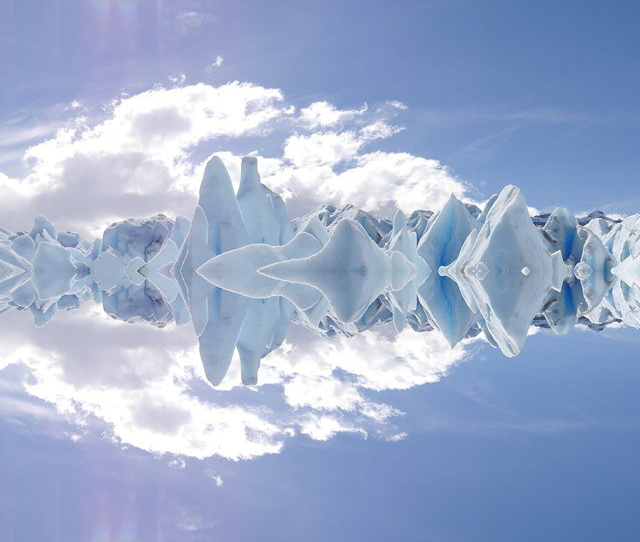

In [4]:
or_2=original.crop((round(original.width/3),0,round((original.width*2)/3),original.height)) #hago el corte del medio de la imagen 
or_2=or_2.crop((0,0,or_2.width,round(or_2.height*0.6))) #trabajo con el 60% de la alutra 
or_2e = or_2.transpose(Image.FLIP_TOP_BOTTOM) #espejo la imagen para luego unirla en una 


or_2sum = Image.new('RGB', (or_2.width, or_2.height*2), (255, 255, 255)) # Creo la imagen para luego pegar las dos
or_2sum.paste(or_2, (0,0)) #pego la primera arriba 
or_2sum.paste(or_2e, (0, or_2.height)) #pego la segunda abajo

or_2sum= or_2sum.resize((or_2sum.width,original.height)) #redimensiono la altura de la imagen dejandola como la altura de la original (el ancho lo modifico luego de unir las 3 imagenes)

print(or_2sum.size) #muestro resultado
or_2sum





Trabajo con el tercer corte 

(542, 542)


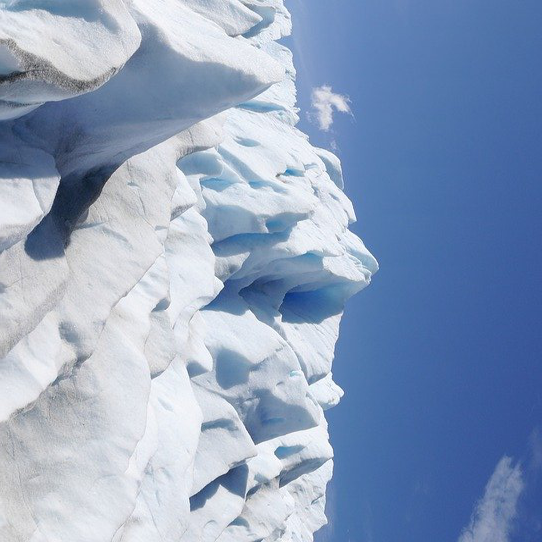

In [5]:
or_3= original.crop((round((original.width*2)/3),0,original.width,original.height)) #hago el tercer corte de la imagen 
or_3= or_3.rotate(270,expand=True) #roto la imagen y expando
or_3= or_3.resize((or_3.width,original.height)) #vuelvo a redimensionar la imagen en alto igual al alto de la original(el ancho lo modifico luego de pegar las 3 imagenes)

print(or_3.size) #muestro resultado
or_3

Sumo los tres cortes luego de trabajar con ellos 

(1920, 540)


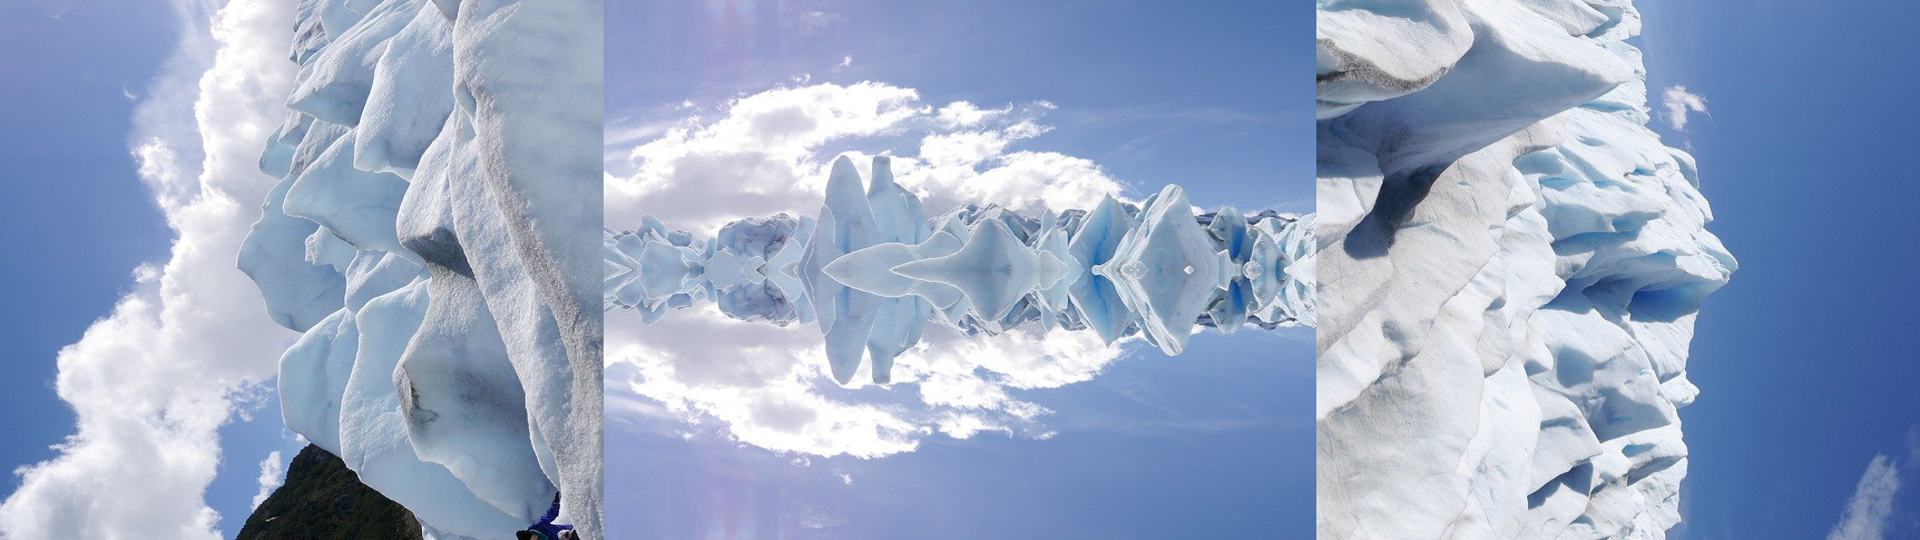

In [6]:
or_t = Image.new('RGB', (or_1.width+or_2sum.width+or_3.width, original.height), (255, 255, 255)) # Tipo, tamaño, color La creo con el tamaño de la original
or_t.paste(or_1, (0,0)) #pego la primera  
or_t.paste(or_2sum, (or_1.width, 0)) #pego la segunda consiguiente a la primera
or_t.paste(or_3,(or_1.width+or_2sum.width,0)) #pego la tercera al final
or_t=or_t.resize((1920,540)) #redimensiono el tamaño de la union de las 3 imagenes al tamaño de la original (ahora si el ancho se modifica para adaptarse a la original)
print(or_t.size)

or_t

Creo la imagen en blanco y negro

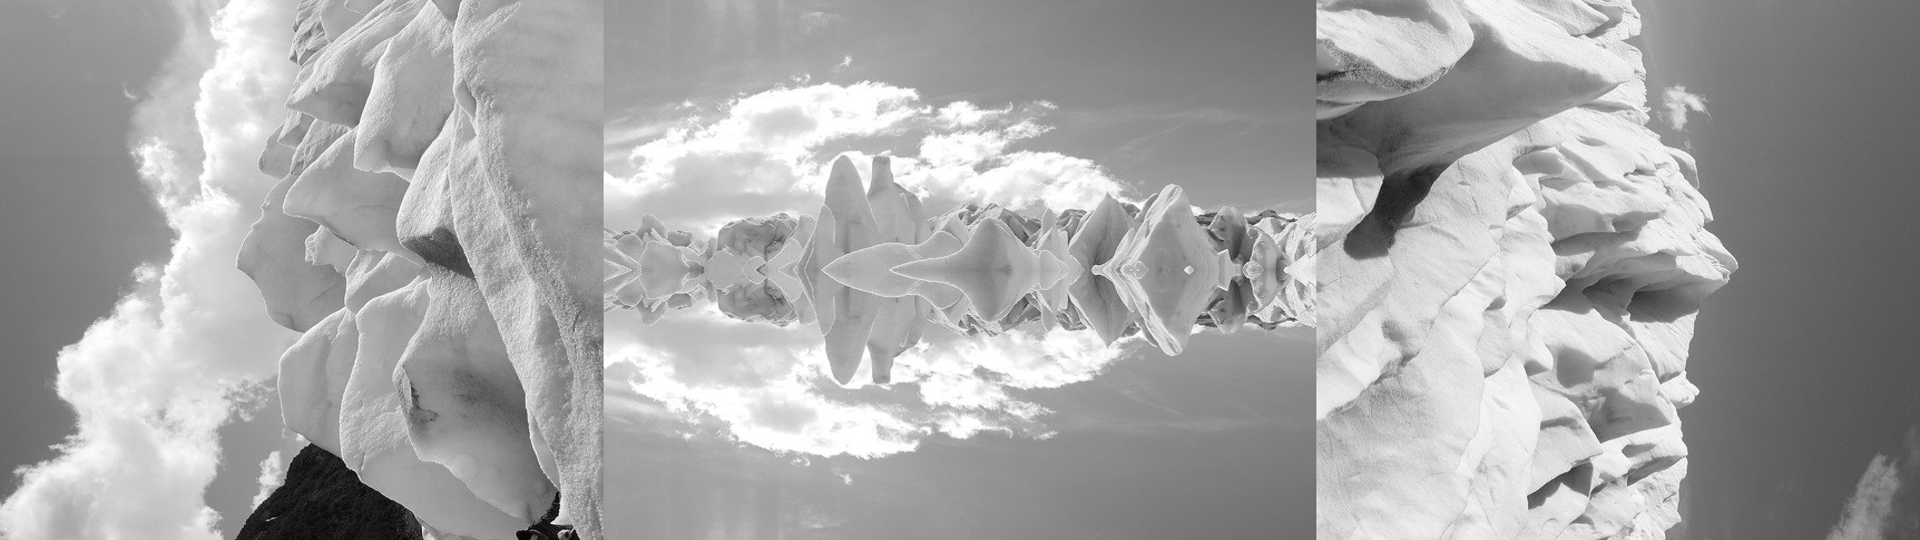

In [7]:
or_tgrey = or_t.convert('L') #convierto la imagen a gris
or_tgrey

Creo el rectangulo en la figura original y luego lo recorto

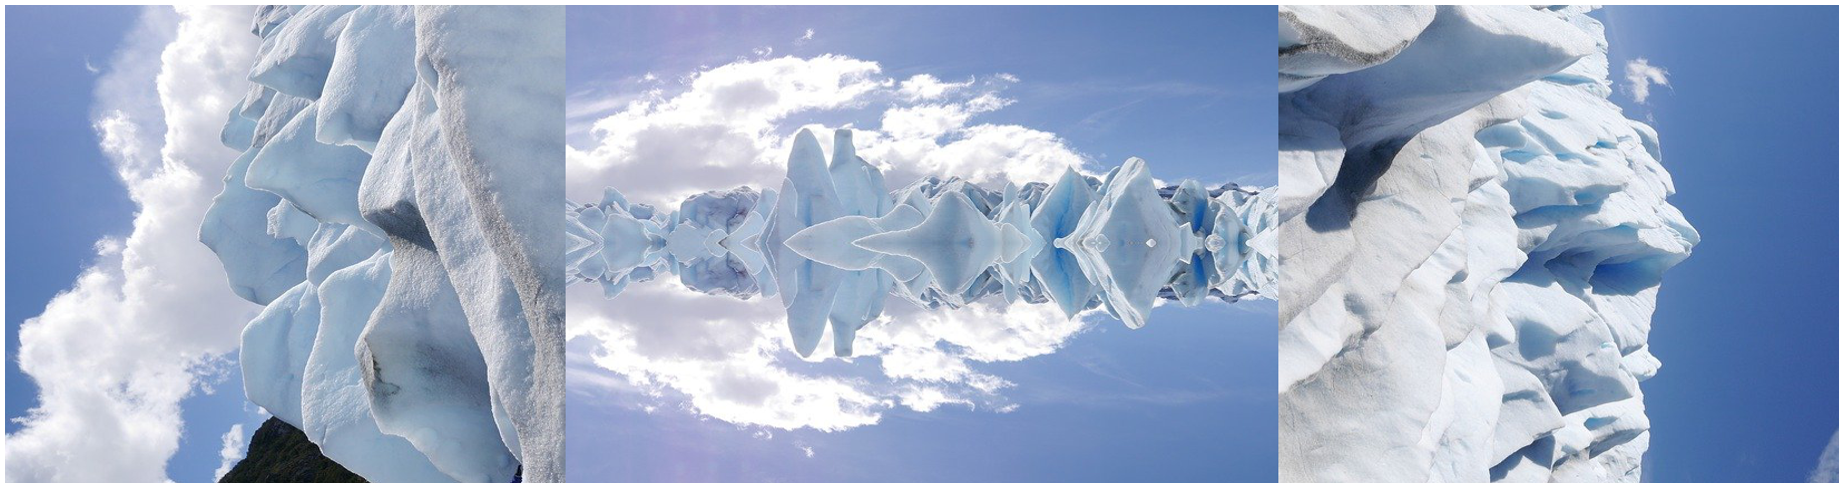

In [8]:

ort_fig = or_t.copy()  # Hace una copia de la imagen
draw = ImageDraw.Draw(ort_fig) # Convierte la imagen en un dibujo editable

draw.rectangle([(original.width*0.02, original.height*0.05), (original.width-(original.width*0.02), original.height-(original.height*0.05))], outline='white', width=5)  # dibujo el rectangulo con las dimensiones especificadas 

ort_figrec = ort_fig.crop((original.width*0.02,original.height*0.05,original.width-(original.width*0.02),original.height-(original.height*0.05))) #recorto la imagen en donde comienza el rectangulo blanco

ort_figrec #muestro la imagen

Uno la imagen en blanco y negro con el recorte del rectangulo blanco de 5 pixeles

(1920, 542)


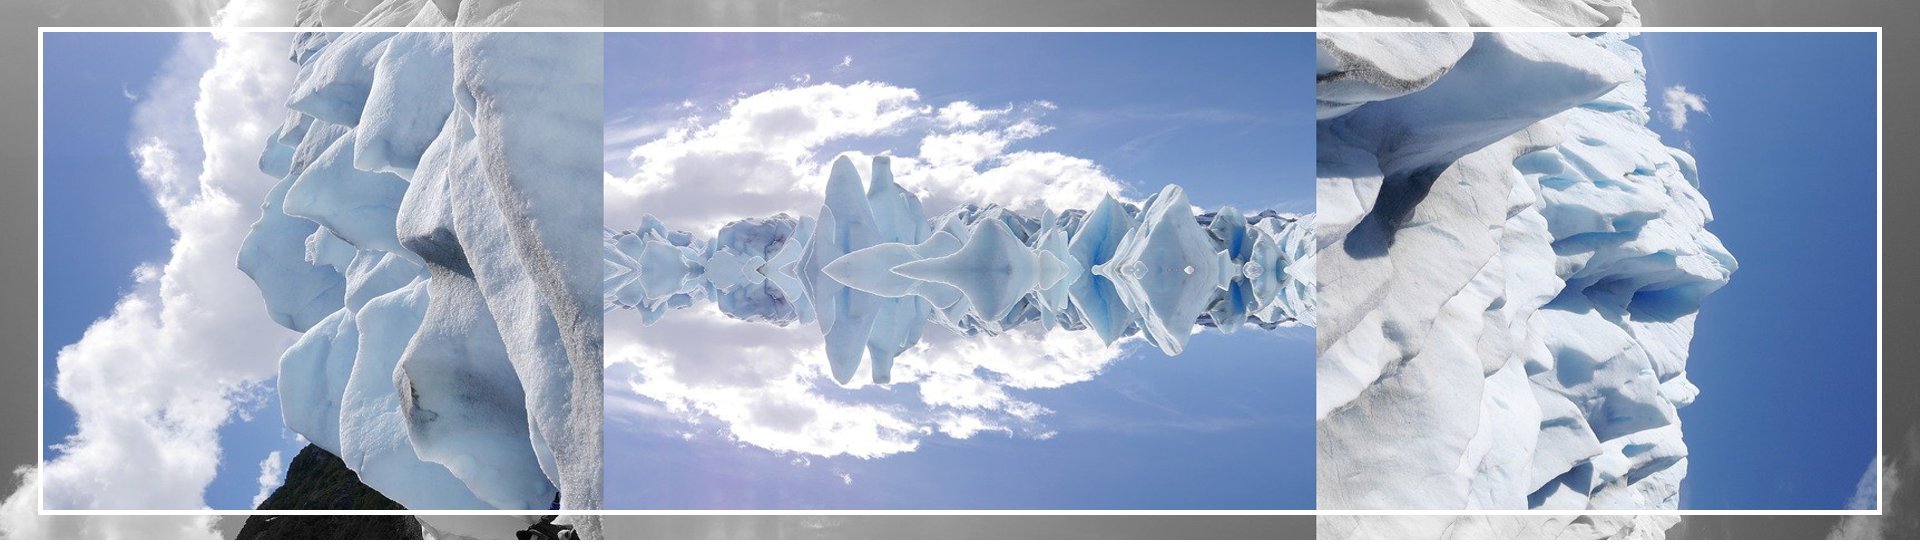

In [9]:
or_final= Image.new('RGB', (original.width, original.height), (255, 255, 255)) #creo el tamaño y formato de la imagen que voy a unir 
or_final.paste(or_tgrey, (0,0)) #pego la imagen con escala de grises 
or_final.paste(ort_figrec,(round(original.width*0.02),round(original.height*0.05))) #pego la imagen con el rectangulo al 2% de ancho y 5% de alto

print(or_final.size) #muestro el tamaño de la imagen final


or_final.save('/content/drive/MyDrive/Colab Notebooks/Proyecto 2/imagenfinal.png','PNG') #modificar ruta de guardado para poder probarlo (guardo la imagen en formato png)

or_final #muestro la imagen